<a href="https://colab.research.google.com/github/GeoKauko/TheNavySeals/blob/main/spectral_signatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Connect to the google drive if you use Google Colaboratory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install rasterio -q

In [4]:
import zipfile
from glob import glob
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [6]:
zip_path = "/content/drive/MyDrive/TheNavySeals/data.zip"
data_path = "/content/drive/MyDrive/TheNavySeals/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(data_path)

In [7]:
image_dir = '/content/drive/MyDrive/TheNavySeals/data/pansharpened/train/images'
mask_dir = '/content/drive/MyDrive/TheNavySeals/data/pansharpened/train/masks'

image_files = sorted(glob(os.path.join(image_dir, '*.tif')))
mask_files = sorted(glob(os.path.join(mask_dir, '*.tif')))

In [8]:
def extract_spectral_signatures(image_file, mask_file):
    with rasterio.open(image_file) as src:
        image = src.read()

    with rasterio.open(mask_file) as src:
        mask = src.read(1)

    # get seal and non seal pixels
    seal_pixels = image[:, mask == 1]
    nonseal_pixels = image[:, mask == 0]

    return seal_pixels, nonseal_pixels

## Plot the difference in spectral signatures in all training images

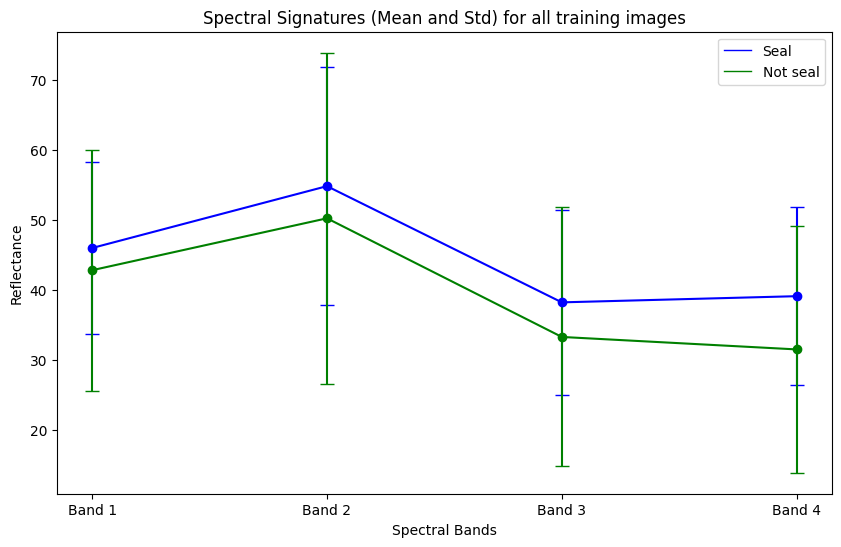

In [16]:
# Lists to store signatures
seal_signatures = []
nonseal_signatures = []

# Get signatures with a loop
for image_file, mask_file in zip(image_files, mask_files):
    seal_pixels, nonseal_pixels = extract_spectral_signatures(image_file, mask_file)
    seal_signatures.append(seal_pixels)
    nonseal_signatures.append(nonseal_pixels)

# Convert to arrays
seal_signatures = np.concatenate(seal_signatures, axis=1)
nonseal_signatures = np.concatenate(nonseal_signatures, axis=1)

# Calculate mean and standard deviation
seal_mean = np.mean(seal_signatures, axis=1)
seal_std = np.std(seal_signatures, axis=1)
nonseal_mean = np.mean(nonseal_signatures, axis=1)
nonseal_std = np.std(nonseal_signatures, axis=1)

bands = range(1, seal_signatures.shape[0] + 1)
plt.figure(figsize=(10, 6))

# Plot mean and std for seal pixels
plt.errorbar(bands, seal_mean, yerr=seal_std, fmt='-o', color='blue', label='Seal', capsize=5)

# Plot mean and std for non-seal pixels
plt.errorbar(bands, nonseal_mean, yerr=nonseal_std, fmt='-o', color='green', label='Not seal', capsize=5)

plt.xticks(bands, [f'Band {b}' for b in bands])
plt.xlabel('Spectral Bands')
plt.ylabel('Reflectance')
plt.title('Spectral Signatures (Mean and Std) for all training images')

# Create legend
legend_handles = [
    Line2D([0], [0], color='blue', lw=1, label='Seal'),
    Line2D([0], [0], color='green', lw=1, label='Not seal')
]
plt.legend(handles=legend_handles)
plt.show()

## Plot the difference in spectral signatures in an image with confirmed seals

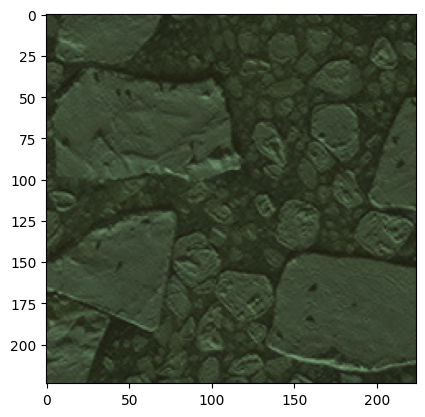

In [10]:
image_file = image_files[600]
mask_file = mask_files[600]

# plot image
with rasterio.open(image_file) as src:
    image = src.read([1, 2, 3])

plt.imshow(np.transpose(image, (1, 2, 0)))
plt.show()


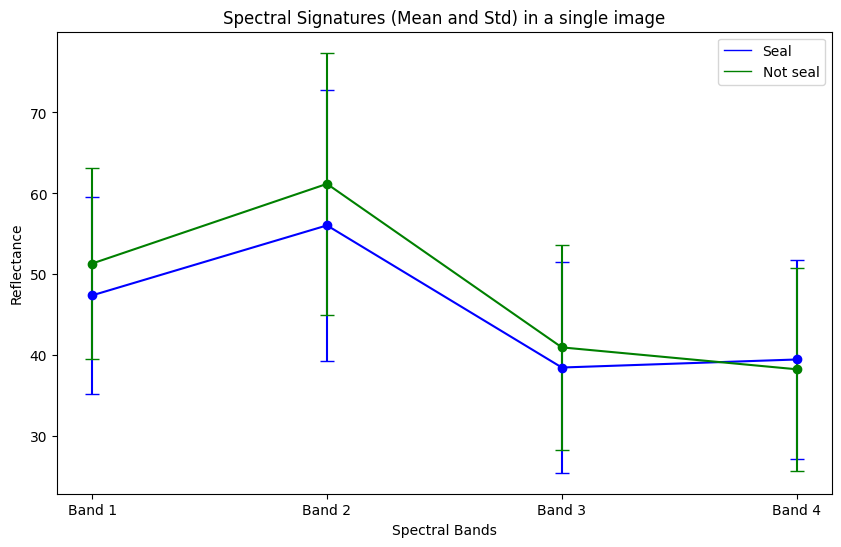

In [18]:
# Get spectral signatures for the single image
seal_pixels_img, nonseal_pixels_img = extract_spectral_signatures(image_file, mask_file)

# Calculate mean and standard deviation
seal_mean = np.mean(seal_pixels_img, axis=1)
seal_std = np.std(seal_pixels_img, axis=1)
nonseal_mean = np.mean(nonseal_pixels_img, axis=1)
nonseal_std = np.std(nonseal_pixels_img, axis=1)

# Plot the spectral signatures
bands = range(1, seal_mean.shape[0] + 1)
plt.figure(figsize=(10, 6))

# Plot mean and std for seal pixels
plt.errorbar(bands, seal_mean, yerr=seal_std, fmt='-o', color='blue', label='Seal', capsize=5)

# Plot mean and std for non-seal pixels
plt.errorbar(bands, nonseal_mean, yerr=nonseal_std, fmt='-o', color='green', label='Not seal', capsize=5)

plt.xticks(bands, [f'Band {b}' for b in bands])
plt.xlabel('Spectral Bands')
plt.ylabel('Reflectance')
plt.title('Spectral Signatures (Mean and Std) in a single image')

# Create legend
legend_handles = [
    Line2D([0], [0], color='blue', lw=1, label='Seal'),
    Line2D([0], [0], color='green', lw=1, label='Not seal')
]
plt.legend(handles=legend_handles)
plt.show()